### Importación de datos



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs de los archivos
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Cargar y combinar datos
dfs = []
for i, url in enumerate(urls, 1):
    df_temp = pd.read_csv(url)
    df_temp['tienda'] = f'Tienda {i}'
    dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)

# Ver primeras filas
print(df.head())

# Información general
print(df.info())

# Revisar valores nulos
print(df.isnull().sum())

# Resumen estadístico
print(df.describe())


            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon    tienda  
0  Tarjeta de crédito                   8   4.60971 -74.08175  Tienda 1  
1  T

In [5]:
print("Dimensiones:", df.shape)
print("\nColumnas:", df.columns.tolist())
print("\nInfo general:")
print(df.info())
print("\nPrimeras filas:")
print(df.head())

Dimensiones: (9435, 13)

Columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda']

Info general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat  

In [7]:
# Asegurar que precio y envío son numéricos
df["Precio"] = pd.to_numeric(df["Precio"], errors="coerce")
df["Costo de envío"] = pd.to_numeric(df["Costo de envío"], errors="coerce")

# Revisar nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
tienda                    0
dtype: int64


#1. Análisis de facturación



In [9]:
# Ingresos por tienda
ingresos_por_tienda = df.groupby("tienda")["Precio"].sum()

# 2. Ventas por categoría

In [11]:
# Categorías más vendidas
categorias_top = df["Categoría del Producto"].value_counts()

# 3. Calificación promedio de la tienda


In [13]:
# Reseñas promedio por tienda
reseñas_por_tienda = df.groupby("tienda")["Calificación"].mean()

# 4. Productos más y menos vendidos

In [15]:
# Top 10 productos más vendidos
top_productos = df["Producto"].value_counts().head(10)

In [17]:
# Top 10 productos MENOS vendidos (excluyendo los que no se venden)
menos_vendidos = df["Producto"].value_counts().tail(10)

# 5. Envío promedio por tienda

In [19]:
# Envío promedio por tienda
envio_promedio = df.groupby("tienda")["Costo de envío"].mean()

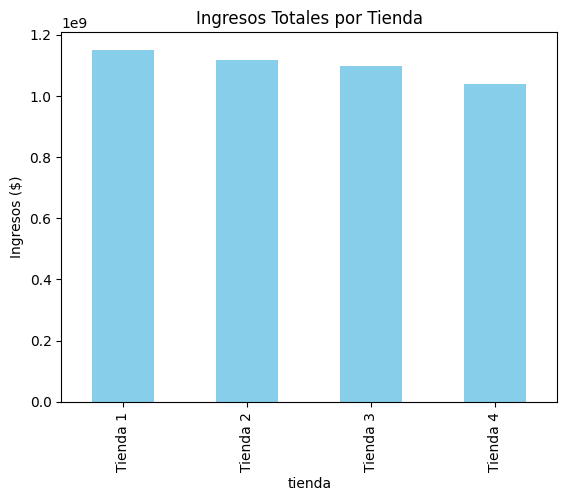

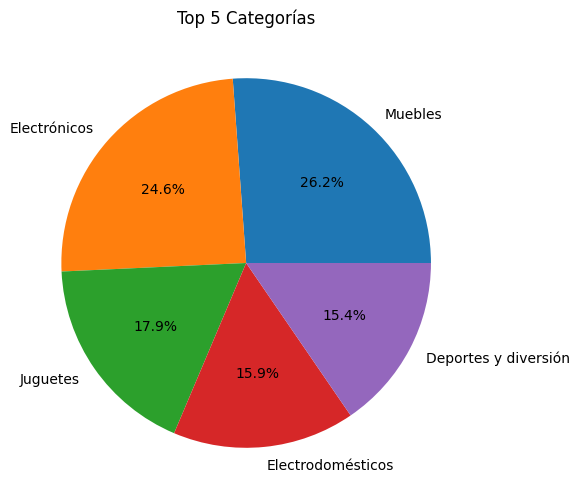

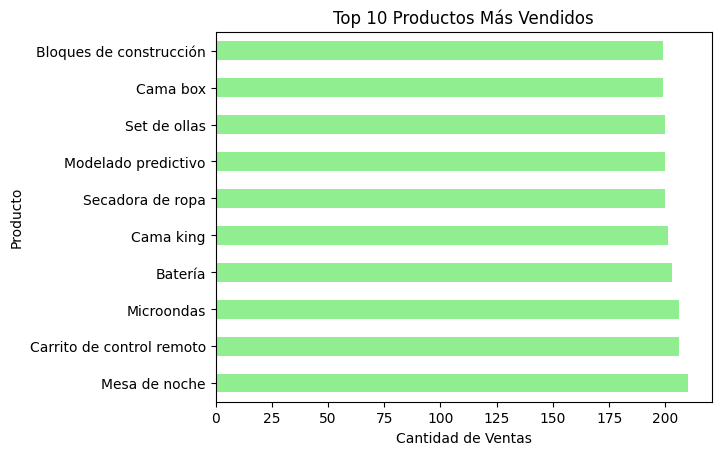

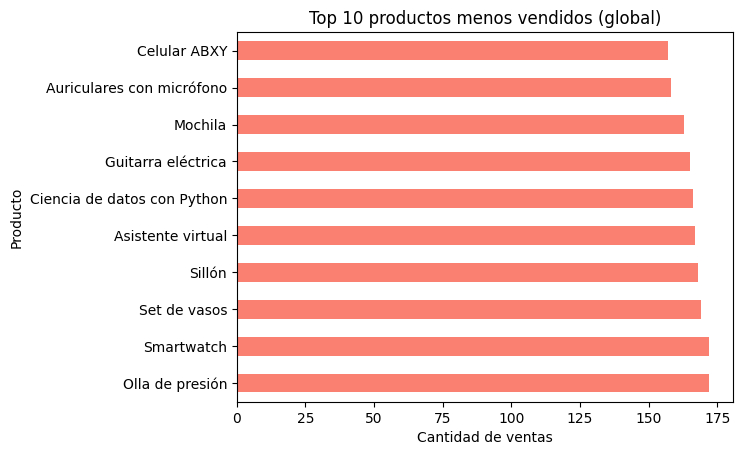

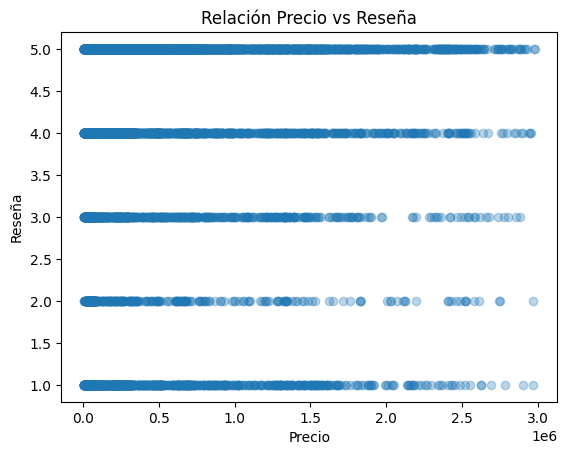

In [24]:
# --- Gráfico 1: Ingresos por tienda
ingresos_por_tienda.plot(kind="bar", color="skyblue", title="Ingresos Totales por Tienda")
plt.ylabel("Ingresos ($)")
plt.show()

# --- Gráfico 2: Categorías más vendidas (Top 5 en circular)
categorias_top.head(5).plot(kind="pie", autopct="%1.1f%%", figsize=(6,6), title="Top 5 Categorías")
plt.ylabel("")
plt.show()

# --- Gráfico 3: Top 10 productos más vendidos
top_productos.plot(kind="barh", color="lightgreen", title="Top 10 Productos Más Vendidos")
plt.xlabel("Cantidad de Ventas")
plt.show()

menos_vendidos.plot(kind="barh", color="salmon", title="Top 10 productos menos vendidos (global)")
plt.xlabel("Cantidad de ventas")
plt.show()

# --- (Opcional) Gráfico 4: Precio vs Reseña
plt.scatter(df["Precio"], df["Calificación"], alpha=0.3)
plt.title("Relación Precio vs Reseña")
plt.xlabel("Precio")
plt.ylabel("Reseña")
plt.show()

In [25]:
print("\nIngresos por tienda:")
print(ingresos_por_tienda)

print("\nReseñas promedio por tienda:")
print(reseñas_por_tienda)

print("\nEnvío promedio por tienda:")
print(envio_promedio)

print("\nTop 5 categorías:")
print(categorias_top.head())

print("Top 10 productos MENOS vendidos (global):")
print(menos_vendidos)

print("\nTop 10 productos:")
print(top_productos)


Ingresos por tienda:
tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64

Reseñas promedio por tienda:
tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64

Envío promedio por tienda:
tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64

Top 5 categorías:
Categoría del Producto
Muebles                 1886
Electrónicos            1772
Juguetes                1290
Electrodomésticos       1149
Deportes y diversión    1113
Name: count, dtype: int64
Top 10 productos MENOS vendidos (global):
Producto
Olla de presión                172
Smartwatch                     172
Set de vasos                   169
Sillón                         168
Asistente virtual              167
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochi

Informe de Análisis de Tiendas – Decisión de Venta

Introducción


El objetivo de este análisis es identificar cuál de las cuatro tiendas del Sr. Juan presenta peores indicadores de desempeño y, por lo tanto, sería la candidata más lógica para vender. Para ello, se evaluaron métricas clave como ingresos, calificaciones promedio de clientes, costo de envío, categorías y productos más y menos vendidos.

Desarrollo

1. Ingresos totales por tienda

Los ingresos acumulados muestran que la Tienda 4 es la que registra el menor total de ventas:

Tienda	Ingresos


*   Tienda 1	1.150.880.000
*   Tienda 2	1.116.344.000
*   Tienda 3	1.098.020.000
*   Tienda 4	1.038.376.000


Esto indica que Tienda 4 genera menos ingresos que el resto, una señal de bajo desempeño.

2. Calificaciones promedio de clientes

Las reseñas promedio por tienda muestran que Tienda 4 no destaca por satisfacción del cliente:

Tienda	Calificación promedio

*   Tienda 1	3.98
*   Tienda 2	4.04
*   Tienda 3	4.05
*   Tienda 4	4.00

Aunque no es la peor, no supera significativamente al resto, por lo que no compensa su menor ingreso.

3. Costo de envío promedio

Tienda 4 tiene el menor costo de envío, lo que podría indicar eficiencia logística, pero también puede reflejar menor cobertura o menores ventas:

Tienda	Costo de envío promedio


*   Tienda 1	26.018
*   Tienda 2	25.216
*   Tienda 3	24.806
*   Tienda 4	23.459










4. Categorías y productos


Top categorías (global): Muebles, Electrónicos, Juguetes, Electrodomésticos, Deportes y diversión.

Productos más vendidos (global): Mesa de noche, Carrito de control remoto, Microondas, Batería, Cama king.

Productos menos vendidos (global): tu snippet muestra los 10 productos con menor rotación.

Productos menos vendidos por tienda: el análisis muestra que Tienda 4 concentra una mayor proporción de productos de baja rotación, lo que refuerza su bajo desempeño.

5. Gráficos generados

Gráfico de ingresos por tienda: Tienda 4 es la más baja.

Gráfico de calificaciones promedio: Tienda 4 no destaca.

Gráfico de productos menos vendidos por tienda: Tienda 4 concentra la mayor cantidad de artículos de baja rotación.

Conclusión y Recomendación

Con base en los datos analizados:

Ingresos totales más bajos: Tienda 4.

Menor desempeño en productos vendidos: Tienda 4 concentra artículos de baja rotación.

Calificaciones promedio: neutrales, no compensan los otros indicadores.

Costo de envío: el más bajo, pero no suficiente para justificar su permanencia.

Recomendación: El Sr. Juan debería vender Tienda 4, ya que es la que presenta indicadores más bajos en ventas y rotación de productos, lo que permitiría optimizar la operación y concentrarse en las tiendas más rentables.